In [3]:
with open('assets/_result.txt', 'r') as f:
    lines = f.readlines()

In [4]:
bool(lines[0].split(', ')[2].split(': ')[-1])

True

In [10]:
d = {}

for line in lines:
    w, a, hwq, prec = line.split(',')
    w = int(w.split(': ')[-1])
    a = int(a.split(': ')[-1])
    hwq = hwq.split(': ')[-1]
    prec = float(prec.split(': ')[-1][:-1])

    if a not in d:
        d[a] = {}
    if w not in d[a]:
        d[a][w] = prec
    d[a][w] = prec if w not in d[a] else max(prec, d[a][w])

In [11]:
d[-1]

{8: 0.9860000014305115,
 7: 0.9843000173568726,
 6: 0.98089998960495,
 5: 0.9635000228881836,
 4: 0.5889000296592712,
 3: 0.517300009727478,
 2: 0.5740000009536743}

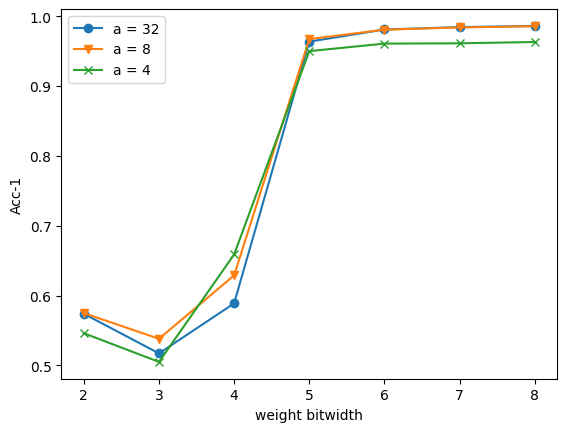

In [12]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.plot(list(d[-1].keys()), list(d[-1].values()), '-o', label=f'a = 32')
ax.plot(list(d[8].keys()), list(d[8].values()), '-v', label=f'a = 8')
ax.plot(list(d[4].keys()), list(d[4].values()), '-x', label=f'a = 4')
ax.legend(loc='upper left')
ax.set_xlabel('weight bitwidth')
ax.set_ylabel('Acc-1')
plt.savefig('./w-a.png', format='png')
plt.show()


In [11]:
pr_s, q_s = [3,4,3,3,3,3,3,5,5,3,3,3], [7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]

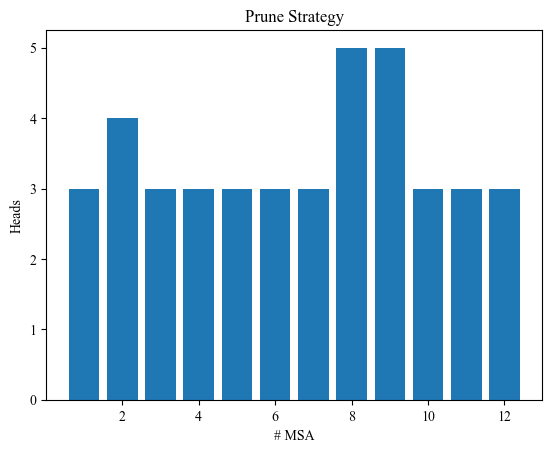

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'times new roman'
plt.bar(range(1, len(pr_s)+1), pr_s)
plt.title('Prune Strategy')
plt.xlabel('# MSA')
plt.ylabel('Heads')

# 显示图形
plt.savefig('pr-s.png', format='png')
plt.show()

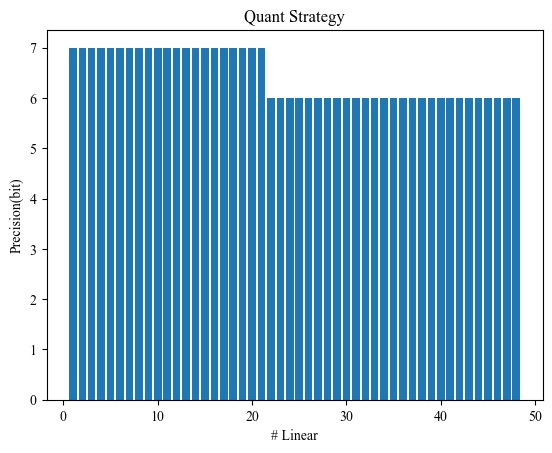

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'times new roman'
plt.bar(range(1, len(q_s)+1), q_s)
plt.title('Quant Strategy')
plt.xlabel('# Linear')
plt.ylabel('Precision(bit)')

# 显示图形
plt.savefig('q-s.png', format='png')
plt.show()

In [1]:
from model import get_vit, SelfAttention
import args

d:\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vit = get_vit(args.VIT, r'D:\d-storage\output\vit\0.9853000044822693.pt')

<All keys matched successfully>


In [3]:
import torch
std, mean = torch.std_mean(torch.randn(12, 3, 4), [1, 2])

In [4]:
qkv_mean = [], [], []
qkv_std = [], [], []
for m in vit.modules():
    if type(m) is SelfAttention:
        qkv = [m.query, m.key, m.value]
        for means, stds, e in zip(qkv_mean, qkv_std, qkv):
            std, mean = torch.std_mean(e.weight.permute(1, 0, 2), [1, 2])
            means.append(mean.data)
            stds.append(std.data)

In [5]:
qkv_mean[0][0]

tensor([-0.0007, -0.0032, -0.0034, -0.0040,  0.0019, -0.0018,  0.0042,  0.0043,
         0.0028, -0.0007, -0.0002, -0.0001])

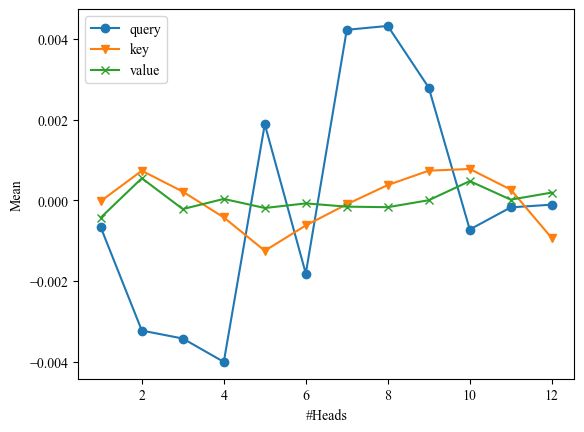

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'times new roman'
fig, ax = plt.subplots()

ax.plot(list(range(1, len(qkv_mean[0][0])+1)), qkv_mean[0][0], '-o', label='query')
ax.plot(list(range(1, len(qkv_mean[0][0])+1)), qkv_mean[0][1], '-v', label='key')
ax.plot(list(range(1, len(qkv_mean[0][0])+1)), qkv_mean[0][2], '-x', label='value')
ax.legend(loc='upper left')
ax.set_xlabel('#Heads')
ax.set_ylabel('Mean')
plt.savefig('vit-head-mean.png', format='png')
plt.show()

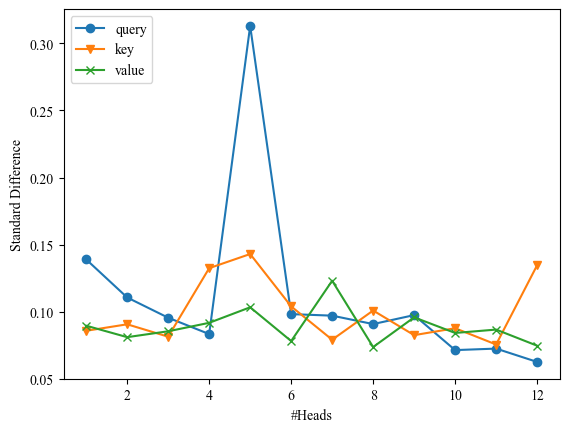

In [7]:
plt.rcParams['font.sans-serif'] = 'times new roman'
fig, ax = plt.subplots()

ax.plot(list(range(1, len(qkv_std[0][0])+1)), qkv_std[0][0], '-o', label='query')
ax.plot(list(range(1, len(qkv_std[0][0])+1)), qkv_std[0][1], '-v', label='key')
ax.plot(list(range(1, len(qkv_std[0][0])+1)), qkv_std[0][2], '-x', label='value')
ax.legend(loc='upper left')
ax.set_xlabel('#Heads')
ax.set_ylabel('Standard Difference')
plt.savefig('vit-head-std.png', format='png')
plt.show()